In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data=load_breast_cancer()
x,y=data.data,data.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [5]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/5e/03/15cd49e855c62226ecf1831bbe4c8e73a4324856077a23c495538a36e557/xgboost-3.0.0-py3-none-win_amd64.whl.metadata
  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 1.3 MB/s eta 0:01:58
   ---------------------------------------- 0.3/150.0 MB 3.5 MB/s eta 0:00:43
   ---------------------------------------- 0.7/150.0 MB 6.2 MB/s eta 0:00:24
   ---------------------------------------- 0.7/150.0 MB 4.5 MB/s eta 0:00:33
   ---------------------------------------- 0.9/150.0 MB 4.4 MB/s eta 0:00:34
   ---------------------------------------- 1.4/150.0 MB 5.4 MB/s eta 0:00:28
   ---------------------------------------- 1.4/150.0 MB 5.4 MB/s eta 0:00:28
   ---------------------------------------- 1.4/150.0 MB 5.4 MB/s eta 0:00:28
    --------------------------

In [10]:
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

bagging=BaggingClassifier(RandomForestClassifier(),n_estimators=50,random_state=42)
bagging.fit(x_train_scaled,y_train)
bagging_acc=accuracy_score(y_test,bagging.predict(x_test_scaled))

ada=AdaBoostClassifier(n_estimators=50,random_state=42)
ada.fit(x_train_scaled,y_train)
ada_acc=accuracy_score(y_test,ada.predict(x_test_scaled))

gb=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,random_state=42)
gb.fit(x_train_scaled,y_train)
gb_acc=accuracy_score(y_test,gb.predict(x_test_scaled))

xgb=XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=42)
xgb.fit(x_train_scaled,y_train)
xgb_acc=accuracy_score(y_test,xgb.predict(x_test_scaled))


C:\Users\CVR\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:11:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [12]:
print("Bagging Accuracy:",bagging_acc)
print("AdaBoost Accuracy:", ada_acc)
print("Gradient Boosting Accuracy:", gb_acc)
print("XGBoost Accuracy:", xgb_acc)

Bagging Accuracy: 0.9649122807017544
AdaBoost Accuracy: 0.9649122807017544
Gradient Boosting Accuracy: 0.956140350877193
XGBoost Accuracy: 0.956140350877193


C:\Users\CVR\AppData\Local\Temp\ipykernel_12696\3843574272.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=x[:, 0], palette=["red", "green"])  # Using "mean radius" feature


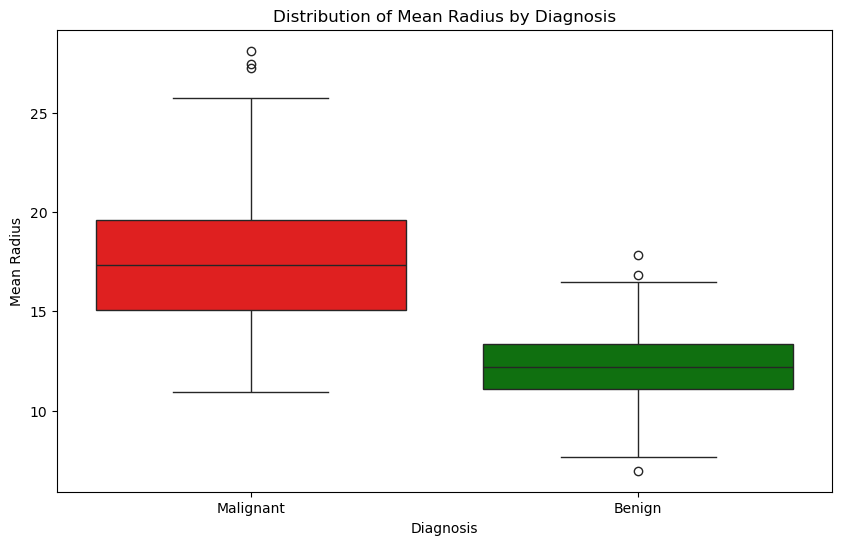

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x=y, y=x[:, 0], palette=["red", "green"])  # Using "mean radius" feature
plt.xticks(ticks=[0, 1], labels=["Malignant", "Benign"])
plt.xlabel("Diagnosis")
plt.ylabel("Mean Radius")
plt.title("Distribution of Mean Radius by Diagnosis")
plt.show()
